In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('NationalNames.csv')

In [3]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [4]:
data.drop(columns='Id',inplace=True)

In [5]:
data.groupby('Gender')['Count'].sum()

Gender
F    167070477
M    170064949
Name: Count, dtype: int64

In [6]:
total_births = data.pivot_table('Count',aggfunc='sum',index='Year',columns='Gender')

In [7]:
total_births

Gender,F,M
Year,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2010,1772738,1913851
2011,1753500,1893230
2012,1753922,1889414


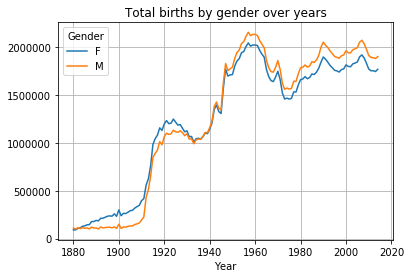

In [8]:
total_births.plot(title='Total births by gender over years',grid=True)

In [9]:
def add_prop(group):  
    group['prop'] = group.Count / group.Count.sum() 
    return group 

data = data.groupby(['Year', 'Gender']).apply(add_prop)

In [10]:
data

,Name,Year,Gender,Count,prop
0,Mary,1880,F,7065,0.077643
1,Anna,1880,F,2604,0.028618
2,Emma,1880,F,2003,0.022013
3,Elizabeth,1880,F,1939,0.021309
4,Minnie,1880,F,1746,0.019188
...,...,...,...,...,...
1825428,Zykeem,2014,M,5,0.000003
1825429,Zymeer,2014,M,5,0.000003
1825430,Zymiere,2014,M,5,0.000003
1825431,Zyran,2014,M,5,0.000003


In [11]:
data.groupby(['Year','Gender']).prop.sum() # making sure that the aggregation over all the names are 1 so that its expressing the right ratio of a name over gender in a particular year

Year  Gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
               ... 
2012  M         1.0
2013  F         1.0
      M         1.0
2014  F         1.0
      M         1.0
Name: prop, Length: 270, dtype: float64

In [12]:
def get_top1000(group):   
    return group.sort_values(by='Count', ascending=False)[:1000] 

grouped = data.groupby(['Year', 'Gender']) 
top1000 = grouped.apply(get_top1000)

In [13]:
top1000

Name  Year Gender  Count      prop
Year Gender                                                 
1880 F      0             Mary  1880      F   7065  0.077643
            1             Anna  1880      F   2604  0.028618
            2             Emma  1880      F   2003  0.022013
            3        Elizabeth  1880      F   1939  0.021309
            4           Minnie  1880      F   1746  0.019188
...                        ...   ...    ...    ...       ...
2014 M      1812446       Ayan  2014      M    207  0.000109
            1812452        Ean  2014      M    206  0.000108
            1812453       Leif  2014      M    205  0.000108
            1812454     Reagan  2014      M    205  0.000108
            1812455      Rylen  2014      M    205  0.000108

[269877 rows x 5 columns]

In [20]:
# top1000.reset_index(drop = True ,inplace=True)
# total_births.head()
total_births =top1000.pivot_table('Count',index='Year' , columns = 'Name' , aggfunc=sum)

In [21]:
 subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000816518B88>,
      dtype=object)

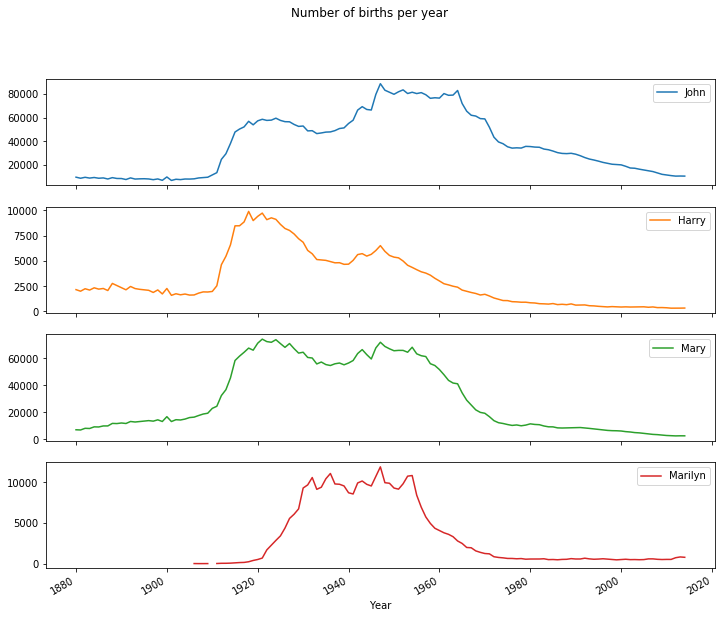

In [68]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,         title="Number of births per year")


In [22]:
#measring the increase of names diversity
table = top1000.pivot_table('prop' , index='Year' , columns = 'Gender' , aggfunc='sum')

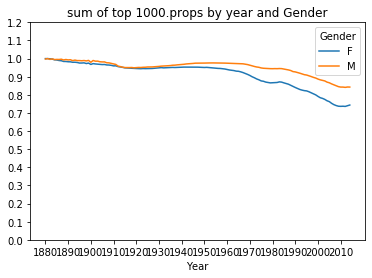

In [26]:
table.plot(title = 'sum of top 1000.props by year and Gender',yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))


In [28]:
boys = data[data.Gender == 'M']

In [29]:
girls = data[data.Gender == 'F']

In [33]:
df = boys[boys.Year == 2010]

In [39]:
prop_cumsum  = df.sort_values(by='prop',ascending=False).prop.cumsum()

In [40]:
prop_cumsum.values.searchsorted(0.5)

116

In [41]:
# Boy names that became girl names (and vice versa)
all_names = pd.Series(top1000.Name.unique())


In [42]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]

In [43]:
lesley_like

632     Leslie
2294    Lesley
4264    Leslee
4731     Lesli
6105     Lesly
dtype: object

In [45]:
filtered = top1000[top1000.Name.isin(lesley_like)]


In [46]:
filtered

,Name,Year,Gender,Count,prop
632,Leslie,1880,F,8,0.000088
1108,Leslie,1880,M,79,0.000715
2462,Leslie,1881,F,11,0.000120
3014,Leslie,1881,M,92,0.000913
4512,Leslie,1882,F,9,0.000083
...,...,...,...,...,...
264633,Lesly,2012,F,367,0.000209
266160,Leslie,2013,F,1111,0.000637
266714,Lesly,2013,F,313,0.000179
268213,Leslie,2014,F,994,0.000562


In [50]:
filtered.groupby('Name').Count.sum() 

Name
Leslee      1082
Lesley     35032
Lesli        929
Leslie    375129
Lesly      11429
Name: Count, dtype: int64

In [52]:
table = filtered.pivot_table('Count', index='Year', columns='Gender', aggfunc='sum')


In [54]:
table = table.div(table.sum(1), axis=0)


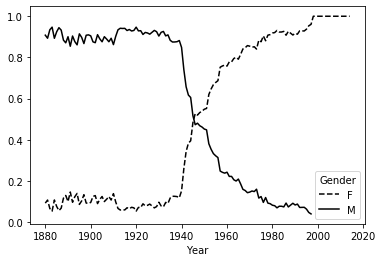

In [55]:
table.plot(style={'M': 'k-', 'F': 'k--'})